# **Building LSTM Model**

Cài đặt Tensorflow

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


Thư viện sử dụng

In [ ]:
# Đọc dữ liệu
import pandas as pd
# Xử lí các dữ liệu số
import numpy as np
# Chuẩn hóa và huấn luyện mô hình
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Xây dựng mô hình LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
# Đọc dữ liệu từ URL
import requests
# Làm việc với file nhị phân
from io import BytesIO
# Dùng để dự đoán kết quả
import matplotlib.pyplot as plt

Đọc dữ liệu, phân tích dữ liệu ban đầu

In [ ]:
url = {'time_series_data_input': 'https://drive.google.com/uc?id=1_FrEnOMGx93QsDUojgPXUlC_4qNyh6fe'}

# Đọc file từ Google Drive
def read_excel_from_drive(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Kiểm tra xem có lỗi tải về không
        return pd.read_excel(BytesIO(response.content), engine='openpyxl')
    except Exception as e:
        print(f"Lỗi khi đọc file từ URL {url}: {e}")
        return None

# Đọc các file và lưu vào DataFrames
dataframes = {name: read_excel_from_drive(url) for name, url in url.items()}
for name, df in dataframes.items():
    if df is not None:
        print(f"{name}: {df.columns.tolist()}")
        print("\n----------------------------\n")
        print(f"Tên tập dữ liệu: {name}")
        print(f"Số dòng: {df.shape[0]}")
        print(f"Số cột: {df.shape[1]}")
        print(f"Kiểu dữ liệu của mỗi cột:\n{df.dtypes}")
    else:
        print(f"Không thể đọc được file {name}")

time_series_data_input: ['mssv', 'dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6', 'dtbhk_7', 'dtbhk_8', 'dtbhk_9', 'dtbhk_10', 'dtbhk_11', 'dtbhk_12', 'dtbhk_13', 'dtbhk_14', 'dtbhk_15', 'dtbhk_16', 'dtbhk_17', 'dtbhk_18', 'dtbhk_19', 'dtbhk_20', 'dtbhk_21', 'dtbhk_22', 'dtbhk_23', 'dtbhk_24', 'dtb_toankhoa']

----------------------------

Tên tập dữ liệu: time_series_data_input
Số dòng: 13608
Số cột: 26
Kiểu dữ liệu của mỗi cột:
mssv             object
dtbhk_1         float64
dtbhk_2         float64
dtbhk_3         float64
dtbhk_4         float64
dtbhk_5         float64
dtbhk_6         float64
dtbhk_7         float64
dtbhk_8         float64
dtbhk_9         float64
dtbhk_10        float64
dtbhk_11        float64
dtbhk_12        float64
dtbhk_13        float64
dtbhk_14        float64
dtbhk_15        float64
dtbhk_16        float64
dtbhk_17        float64
dtbhk_18        float64
dtbhk_19        float64
dtbhk_20        float64
dtbhk_21        float64
dtbhk_22        float

Phân tích dữ liệu, dự kiến kết quả đầu ra:
1.   Input: Mã số sinh viên, điểm trung bình qua từng học kì [Features]
- Dạng: Tensor
- Mô tả: dạng float64
- Chiều: (13607,25)
2.   Output: Điểm trung bình toán khóa của mỗi sinh viên [Label]
- Dạng: Tensor
- Mô tả: dạng float64
- Chiều: (13607,1)




Chuẩn bị dữ liệu

In [ ]:
x = df.iloc[:, 1:25].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled = x_scaled.reshape((x_scaled.shape[0],x_scaled.shape[1],1))
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.2, random_state=42)

print(f"Input - Shape of X_train: {x_train.shape}")
print(f"Output - Shape of y_train: {y_train.shape}")

Input - Shape of X_train: (10886, 24, 1)
Output - Shape of y_train: (10886,)


Xây dựng mô hình: ta dùng Tensorflow

In [ ]:
model = Sequential()
model.add(Input(shape=(24, 1)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 24, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

Train model

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=80, validation_data=(x_test, y_test))

Epoch 1/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 31s 90ms/step - loss: 0.3757 - val_loss: 0.1796
Epoch 2/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - loss: 0.3779 - val_loss: 0.1883
Epoch 3/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - loss: 0.3525 - val_loss: 0.2649
Epoch 4/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 0.3666 - val_loss: 0.2500
Epoch 5/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 0.3497 - val_loss: 0.1762
Epoch 6/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 0.3209 - val_loss: 0.1762
Epoch 7/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.3220 - val_loss: 0.1840
Epoch 8/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - loss: 0.3164 - val_loss: 0.1880
Epoch 9/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - loss: 0.3255 - val_loss: 0.1506
Epoch 10/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.2990 - val_loss: 0.1837
Epoch 11/80
341/341 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.3058 - val_loss: 0.1342
Epoch 12/80
341/341 ━━━━━━━━━━

Đánh giá mô hình

In [ ]:
loss = model.evaluate(x_test, y_test)
print(f"Loss on test data: {loss}")

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0807
Loss on test data: 0.08641409128904343


**Tiến hành dự đoán**




So sánh giữa giá trị thực tế và giá trị huấn luyện

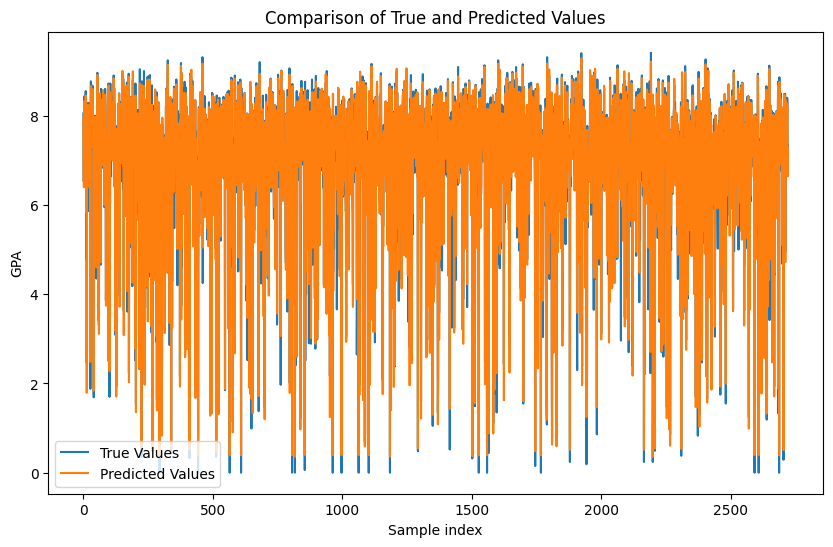

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:13607], label="True Values")
plt.plot(y_pred[:13607], label="Predicted Values")
plt.xlabel('Sample index')
plt.ylabel('GPA')
plt.title('Comparison of True and Predicted Values')
plt.legend()
plt.show()

Tính toán và in ra các giá trị sai số

1.   MSE: cho thấy mô hình có sai số bình phương nhỏ, giá trị MSE càng nhỏ tức là các dự đoán của mô hình càng chính xác.
2.   MAE: các dự đoán của mô hình lệch khoảng x điểm so với giá trị thực tế.



In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.09802178397757061
Mean Absolute Error: 0.18438897405101654


Đồ thị so sánh giữa mất mát khi huấn luyện và mất mát khi kiểm tra

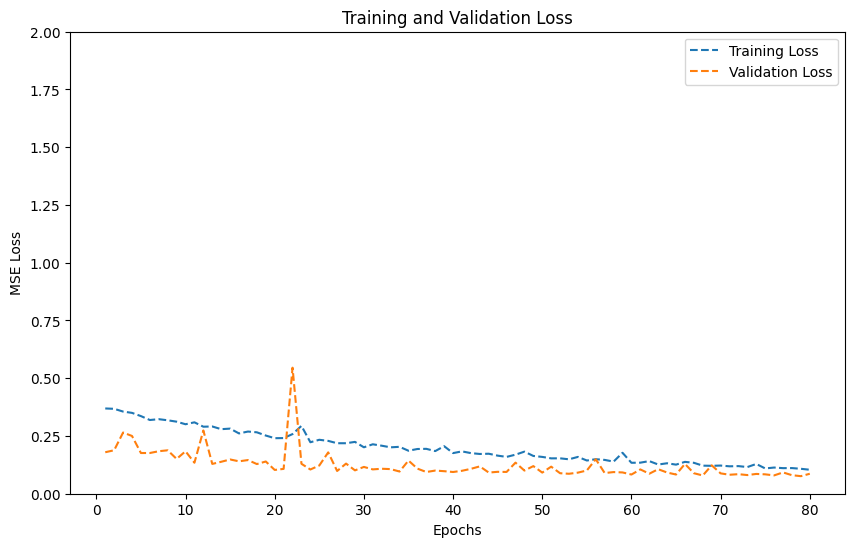

In [ ]:
# Lấy dữ liệu loss từ đối tượng history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
# Vẽ đồ thị loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, '--', label='Training Loss')
plt.plot(epochs, val_loss, '--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.ylim(0, 2)
plt.legend()
plt.show()

Kiểm tra thử input - output

In [ ]:

scaler = StandardScaler().fit(x)
def predict_gpa():
    input_data = input("Nhập các điểm của 24 kỳ học, cách nhau bởi dấu phẩy: ")
    new_data = np.array([float(x) for x in input_data.split(',')]).reshape(1, -1)
    if new_data.shape[1] != 24:
        print("Vui lòng nhập đúng 24 điểm.")
        return
    new_data_scaled = scaler.transform(new_data)
    new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))
    predicted_gpa = model.predict(new_data_scaled)
    print(f"Predicted GPA: {predicted_gpa[0][0]}")
predict_gpa()


Nhập các điểm của 24 kỳ học, cách nhau bởi dấu phẩy: 6.45,5.86,6.54,5.67,2.27,5.52,6.17,4.83,0,7.28,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Predicted GPA: 5.842555046081543
